In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tools import array_of_images, get_threshold, show_images, fill_element, get_component, draw_defect, draw_fruit_outline

In [3]:
# Directory contenente le immagini del dataset

def analyze_image_colors(image):

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Divide i canali H, S, V
    h, s, v = cv2.split(hsv_image)

    # Calcola l'istogramma per ogni canale
    h_hist = cv2.calcHist([h], [0], None, [256], [0, 256])
    s_hist = cv2.calcHist([s], [0], None, [256], [0, 256])
    v_hist = cv2.calcHist([v], [0], None, [256], [0, 256])

    # Visualizza gli istogrammi
    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.plot(h_hist, color='r'), plt.title('Hue')
    plt.subplot(132), plt.plot(s_hist, color='g'), plt.title('Saturation')
    plt.subplot(133), plt.plot(v_hist, color='b'), plt.title('Value')
    plt.show()



In [46]:
# Carica l'immagine
image = cv2.imread("./Second_task/images/C1_000004.png")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


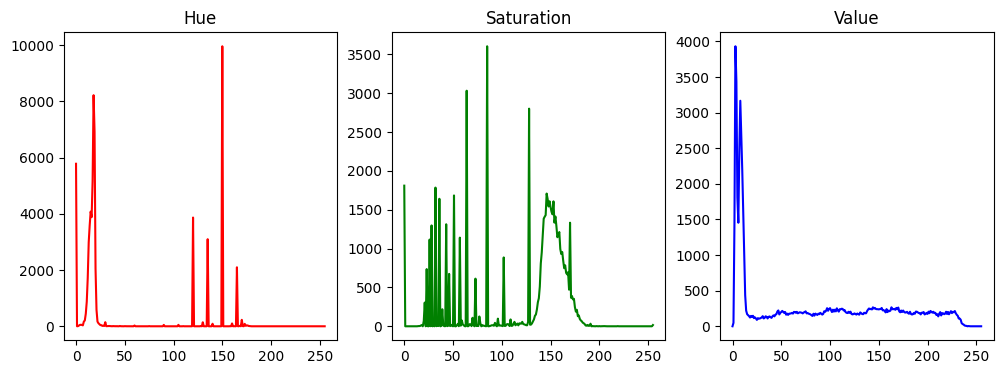

In [47]:
analyze_image_colors(image)

In [6]:
lower_hsv = np.array([20, 28.56, 30])  # Limite inferiore per Hue, Saturation e Value
upper_hsv = np.array([100, 55, 105])  # Limite superiore per Hue, Saturation e Value


def process_image(image):

    # Converte l'immagine nello spazio colore HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Crea una maschera basata sui limiti dei colori HSV
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Applica la maschera all'immagine originale per ottenere solo le parti con i difetti
    result = cv2.bitwise_and(image, image, mask=mask)

    # Mostra l'immagine originale e quella elaborata
    cv2.imshow('Original Image', image)
    cv2.imshow('Defect Highlighted', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [7]:
process_image(image_rgb)

error: OpenCV(4.9.0) /home/conda/feedstock_root/build_artifacts/libopencv_1711055189356/work/modules/core/src/arithm.cpp:1782: error: (-215:Assertion failed) lb.type() == ub.type() in function 'inRange'


In [8]:
gray_image = cv2.imread("./Second_task/images/C0_000004.png")

In [60]:
image_count = 1
# Convert image to grayscale
gray = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)

#STEP 1 - BINARIZATION
# Calculate the adaptive threshold as  median / 2' 
median = get_threshold(gray)

# Binarize the image to separate foreground and background
threshold, binarized = cv2.threshold(gray, median, 255, cv2.THRESH_BINARY)

#Step 2 - SEGMENTATION
# Find the fruit in the image as it is the biggest connencted component
filled_image = fill_element(binarized)

#Step 3 - SMOOTHING
# Get grayscale fruit from filled mask
fruit = cv2.bitwise_and(gray_image, gray_image, mask=filled_image)
#Blurred image with the bilateral filter, that is an edge-preserving filter
blurred_image = cv2.bilateralFilter(fruit, 11, 100, 75)

#Step 4 - EDGE DETECTION
#Use une of the most used, Canny edge detector
canny_image = cv2.Canny(blurred_image, 0, 140)

In [57]:
# Converte l'immagine in HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definisci il range di colore HSV che desideri evidenziare (ad esempio, per il rosso)
lower_hsv = np.array([5, 100, 70])  # Hue minimo, Saturation minima, Value minimo
upper_hsv = np.array([60, 255, 255])

# Crea una maschera binaria per selezionare i pixel nell'intervallo di colore desiderato
mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

# Applica la maschera all'immagine originale per evidenziare solo il colore desiderato
filtered_image = cv2.bitwise_and(image, image, mask=mask)

# Mostra l'immagine filtrata
cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
difference_image = cv2.subtract(image, filtered_image)

# Mostra l'immagine con i pixel filtrati evidenziati
cv2.imshow('Difference Image', difference_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
difference_image = difference_image.astype(np.uint8)
canny_image = canny_image.astype(np.uint8)

# Definisci il kernel per l'operazione di dilatazione
kernel = np.ones((2,2), np.uint8)

eroded = cv2.erode(canny_image, kernel, iterations=1)

# Applica l'operazione di dilatazione all'immagine dei bordi
#canny_image_dilated = cv2.dilate(canny_image, kernel, iterations=1)

# Ridimensiona l'immagine dei bordi dilatati per farla corrispondere alle dimensioni di difference_image
#canny_image_dilated_resized = cv2.resize(canny_image_dilated, (difference_image.shape[1], difference_image.shape[0]))

# Esegui l'operazione di sottrazione tra le immagini
#result_image = cv2.subtract(difference_image, canny_image_dilated_resized)

# Mostra l'immagine risultante
cv2.imshow('Difference Image', eroded)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
image_count = 1
# Convert image to grayscale
gray1 = cv2.cvtColor(difference_image, cv2.COLOR_RGB2GRAY)

#STEP 1 - BINARIZATION
# Calculate the adaptive threshold as  median / 2' 
median1 = get_threshold(gray1)

# Binarize the image to separate foreground and background
threshold1, binarized1 = cv2.threshold(gray1, median1, 255, cv2.THRESH_BINARY)

#Step 2 - SEGMENTATION
# Find the fruit in the image as it is the biggest connencted component
filled_image1 = fill_element(binarized1)

#Step 3 - SMOOTHING
# Get grayscale fruit from filled mask
fruit1 = cv2.bitwise_and(difference_image, difference_image, mask=filled_image1)
#Blurred image with the bilateral filter, that is an edge-preserving filter
blurred_image1 = cv2.bilateralFilter(fruit1, 11, 100, 75)

#Step 4 - EDGE DETECTION
#Use une of the most used, Canny edge detector
canny_image1 = cv2.Canny(blurred_image1, 0, 140)

cv2.imshow('Canny 1', canny_image1)
cv2.waitKey(0)
cv2.destroyAllWindows()